In [1]:
import os
import pandas as pd

from datetime import datetime
import seaborn as sns

In [2]:
path = '../competition/data/'
train_sessions = pd.read_csv(path + 'train_sessions.csv')
train_purchase = pd.read_csv(path + 'train_purchases.csv')
item_features = pd.read_csv(path + 'item_features.csv')

# 公榜 和 私榜 是考察模型的泛化能力


# session

In [3]:
train_sessions.head()

,session_id,item_id,date
0,3,9655,2020-12-18 21:25:00.373
1,3,9655,2020-12-18 21:19:48.093
2,13,15654,2020-03-13 19:35:27.136
3,18,18316,2020-08-26 19:18:30.833
4,18,2507,2020-08-26 19:16:31.211


In [4]:
item_map = train_sessions['item_id'].value_counts()

D:\ana\envs\rs\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

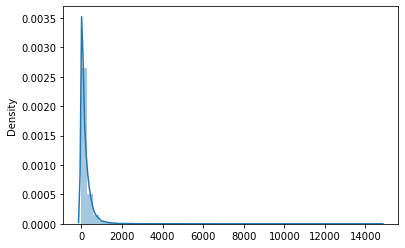

In [5]:
sns.distplot(item_map.values)

In [6]:
# 商品数大于2000 占千分之四左右
len(item_map[item_map>2000])/len(item_map)

0.00489445011916922

In [7]:
session_map = train_sessions['session_id'].value_counts()

In [8]:
session_map

3715268    100
54433      100
913190     100
305141     100
3067101    100
          ... 
3311121      1
1619540      1
3311099      1
1619592      1
2220270      1
Name: session_id, Length: 1000000, dtype: int64

D:\ana\envs\rs\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

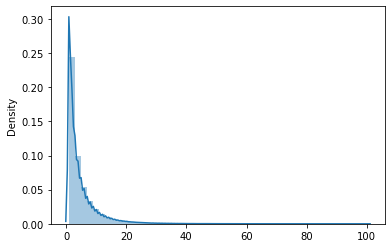

In [9]:
sns.distplot(session_map.values)

In [10]:
# 会话长度 大于20
len(session_map[session_map>20])/len(session_map)

0.027116

In [11]:
# 会话长度 大于40
len(session_map[session_map>40])/len(session_map)

0.003962

In [12]:
# 分布查看
rate_list = []
for thre in range(1,21):
    rate_list.append(len(session_map[session_map<=thre])/len(session_map))
rate_list

[0.307698,
 0.482473,
 0.597972,
 0.680278,
 0.740973,
 0.787326,
 0.823314,
 0.85214,
 0.875183,
 0.894147,
 0.909299,
 0.921984,
 0.932651,
 0.941575,
 0.949189,
 0.955538,
 0.960831,
 0.965384,
 0.969332,
 0.972884]

In [13]:
# pd 看一下
session_count = pd.DataFrame()
session_count['thre'] = [x for x in range(1,21)]
session_count['rate'] = rate_list

In [14]:
session_count

,thre,rate
0,1,0.307698
1,2,0.482473
2,3,0.597972
3,4,0.680278
4,5,0.740973
5,6,0.787326
6,7,0.823314
7,8,0.852140
8,9,0.875183
9,10,0.894147


# Purchase

In [15]:
train_purchase.head()

,session_id,item_id,date
0,3,15085,2020-12-18 21:26:47.986
1,13,18626,2020-03-13 19:36:15.507
2,18,24911,2020-08-26 19:20:32.049
3,19,12534,2020-11-02 17:16:45.92
4,24,13226,2020-02-26 18:27:44.114


In [16]:
purchase_count = train_purchase['item_id'].value_counts()

D:\ana\envs\rs\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

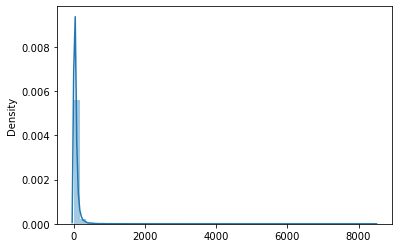

In [17]:
sns.distplot(purchase_count.values)

In [18]:
list(item_map.index)

[8060,
 26853,
 2447,
 1644,
 19882,
 7963,
 8622,
 17089,
 11742,
 18156,
 23088,
 2072,
 4028,
 20770,
 9184,
 21616,
 19912,
 6736,
 26691,
 7640,
 17239,
 27613,
 21215,
 2915,
 18657,
 24921,
 4193,
 1018,
 20236,
 27225,
 12179,
 2814,
 8861,
 27555,
 972,
 4130,
 19150,
 15501,
 14392,
 13922,
 2173,
 12251,
 27151,
 21890,
 21668,
 27852,
 22704,
 10390,
 4917,
 16660,
 2855,
 15140,
 26301,
 7792,
 14550,
 1368,
 16922,
 2098,
 23451,
 7999,
 24243,
 22607,
 13409,
 8755,
 18981,
 21152,
 23789,
 14306,
 15249,
 20629,
 13596,
 11565,
 21781,
 25415,
 27556,
 26249,
 5367,
 27442,
 11053,
 13081,
 12959,
 20028,
 18723,
 9427,
 14927,
 16064,
 22747,
 15738,
 5704,
 18801,
 3774,
 14378,
 12540,
 17740,
 19227,
 16218,
 434,
 15777,
 1148,
 28133,
 2188,
 17431,
 10516,
 22886,
 21423,
 8648,
 26433,
 17648,
 9522,
 19992,
 6588,
 19596,
 26565,
 11693,
 12662,
 18844,
 7367,
 23038,
 13108,
 4407,
 107,
 6256,
 551,
 6187,
 26180,
 1474,
 13243,
 2646,
 15403,
 23828,
 12958,

In [19]:
list(purchase_count.index)

[8060,
 26853,
 19882,
 8622,
 2447,
 4193,
 20770,
 18156,
 17089,
 1644,
 11742,
 27225,
 15501,
 4028,
 2915,
 21215,
 24921,
 23789,
 7963,
 26249,
 6736,
 27852,
 21781,
 11923,
 27555,
 9184,
 14392,
 8861,
 23088,
 19912,
 2173,
 7096,
 2814,
 14550,
 27613,
 12540,
 9427,
 12179,
 972,
 4130,
 16064,
 15249,
 7640,
 12555,
 10390,
 18657,
 17239,
 22607,
 20449,
 12251,
 26691,
 7367,
 1018,
 4917,
 2072,
 9522,
 18981,
 26301,
 18723,
 13596,
 14378,
 13922,
 27416,
 15738,
 27556,
 11053,
 16922,
 21616,
 1368,
 17740,
 17648,
 22886,
 25273,
 434,
 27151,
 20599,
 10983,
 20629,
 17431,
 2845,
 21423,
 2855,
 3233,
 22704,
 14927,
 123,
 18947,
 19150,
 2188,
 20409,
 551,
 1367,
 26433,
 26180,
 1818,
 15403,
 11491,
 12958,
 13296,
 7327,
 25270,
 13409,
 1148,
 13081,
 22719,
 25809,
 2410,
 27442,
 24874,
 1442,
 705,
 19529,
 8368,
 27330,
 15777,
 19944,
 15383,
 22747,
 23451,
 18705,
 25415,
 11327,
 6187,
 14881,
 11565,
 18719,
 14306,
 8616,
 16631,
 3774,
 25118,

# item feature

In [21]:
item_features.head()

,item_id,feature_category_id,feature_value_id
0,2,56,365
1,2,62,801
2,2,68,351
3,2,33,802
4,2,72,75


In [22]:
item_features['feature_category_id'].nunique()

73

In [23]:
item_features['feature_category_id'].unique()

array([56, 62, 68, 33, 72, 29, 16, 50, 61, 53,  7, 69, 47, 17, 32, 11, 45,
       19, 46, 73, 55, 63, 59,  4,  5, 26,  3, 65, 18, 22, 41, 15, 44, 34,
       12, 30, 21, 24, 28, 14,  8, 70, 57, 25, 51, 49, 38, 31, 37, 42, 36,
       67, 39, 23,  2, 60,  6, 48,  1, 58, 52, 35, 43, 10, 54, 64, 71, 20,
       66, 40,  9, 13, 27], dtype=int64)

In [24]:
item_features['item_id'].value_counts()

7970     33
3045     32
18488    32
18779    32
9807     32
         ..
9888      2
6434      2
21562     2
1630      2
16684     2
Name: item_id, Length: 23691, dtype: int64

In [25]:
item_features['feature_category_id'].value_counts()

56    23691
47    23691
50    23077
68    23038
61    22512
      ...  
52      568
54      341
9       137
13      137
27        1
Name: feature_category_id, Length: 73, dtype: int64

In [28]:
item_features['feature_category_id'].value_counts() / item_features['item_id'].nunique()

56    1.000000
47    1.000000
50    0.974083
68    0.972437
61    0.950234
        ...   
52    0.023975
54    0.014394
9     0.005783
13    0.005783
27    0.000042
Name: feature_category_id, Length: 73, dtype: float64

# baseline

In [ ]:
# 使用协同过滤来做 item-CF
# 通过seesion 构建 item-item 共现矩阵
# 根据共现矩阵输出相似度矩阵

# 相似度矩阵 